# sim plan

* for every round
  * procedure?
        * if yes: 
            * offer to random resident (and choose intern who would have gotten it either way for log)
                * if accepts: increment and log to both
                * else: log miss only
        * else
            * log missed procedure0
    * 

# first attempt with no probability:

In [149]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from icecream import ic
from statsmodels.distributions.discrete import poisson, zipoisson

In [108]:
# custom datatype for procedure offer logs
Procedure_Outcome = namedtuple(
    "Procedure_Outcome",
    [
        "day",
        "senior",
        "senior_prior_procedures",
        "intern",
        "intern_prior_procedures",
        "nth_procedure_opportunity_of_the_day",
        "performed",
    ],
)

In [109]:
residents = pd.read_excel("residents.xlsx")
residents

,name,training_level,paracentesis_completed
0,R2 1,senior,0
1,R2 2,senior,0
2,R2 3,senior,0
3,R2 4,senior,0
4,R2 5,senior,0
5,R2 6,senior,0
6,R2 7,senior,0
7,R2 8,senior,0
8,R2 9,senior,0
9,R2 10,senior,0


In [110]:
seniors = residents.training_level == "senior"
interns = residents.training_level == "intern"

<BarContainer object of 10 artists>

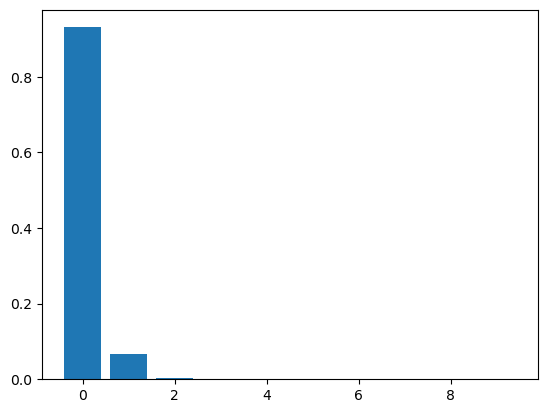

In [161]:
# TODO: integrate Poisson for daily run
poisson_lambda = 1/14
p = poisson(poisson_lambda)
plt.bar(np.arange(0, 10), p.pmf(np.arange(0, 10)))

for example, a month's worth with $\lambda$ = 1/14, which is a Q2wk average divided out

In [ ]:
random_year = p.rvs(365)
random_year

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [172]:
random_year.sum() / 365 - poisson_lambda

np.float64(0.00802348336594913)

pretty close, and gets the randomness right

In [ ]:
days = 30
signoff_threshold = 5
signed_off_avidity = 0.5
not_signed_off_avidity = 0.1

In [ ]:
outcome_log = list()


for day in range(days):
    # TODO: determine number offered (poisson)
    procedure_opportunity_today = 2  # artificial for testing
    for procedure_opportunity in range(procedure_opportunity_today):

        selected_senior = residents[seniors].sample().name.values[0]
        selected_intern = residents[interns].sample().name.values[0]

        if (
            residents.loc[
                residents.name.isin([selected_senior, selected_intern]),
                "paracentesis_completed",
            ]
            >= signoff_threshold
        ).any():
            avidity = signed_off_avidity
        else:
            avidity = not_signed_off_avidity

        performed = None

        if np.random.rand() <= avidity:
            senior_prior_procedures = residents.loc[
                residents.name == selected_senior, "paracentesis_completed"
            ].values[0]

            residents.loc[
                residents.name == selected_senior, "paracentesis_completed"
            ] += 1

            intern_prior_procedures = residents.loc[
                residents.name == selected_intern, "paracentesis_completed"
            ].values[0]

            residents.loc[
                residents.name == selected_intern, "paracentesis_completed"
            ] += 1
            performed = True
        else:
            performed = False

        today_outcome = Procedure_Outcome(
            day=day,
            senior=selected_senior,
            senior_prior_procedures=senior_prior_procedures,
            intern=selected_intern,
            intern_prior_procedures=intern_prior_procedures,
            nth_procedure_opportunity_of_the_day=procedure_opportunity,
            performed=performed,
        )
        outcome_log.append(today_outcome)

In [ ]:
outcomes = pd.DataFrame(outcome_log)
outcomes

In [ ]:
outcomes.performed.sum()

In [ ]:
outcomes.loc[
    (outcomes.senior_prior_procedures == (signoff_threshold - 1)) & (outcomes.performed)
]

In [ ]:
outcomes.loc[
    (outcomes.intern_prior_procedures == (signoff_threshold - 1)) & (outcomes.performed)
]

In [ ]:
outcomes.performed.sum() / len(outcomes)